### Setting up the work enviroment

In [1]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N, preorder_traversal, Float, solve_linear_system,
                   eye, zeros, lambdify)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from chords.symbolic import printer_function
np_printer = printer_function('numpy')

In [2]:
from scipy.special import roots_jacobi

In [3]:
init_vprinting()

In [4]:
x, xi = symbols('x xi')

In [5]:
def x_roots(n):
    return roots_jacobi(n+1, 1, 0)[0]
def element(x, xm, xj):
    return (x-xm)/(xj-xm)

def L_pol(j,k):
    prod = 1
    #x_list = symbols(f'x_0:{k+1}')
    x_list = x_roots(k)
    for m in range(k+1):
        if m != j:
            prod *= element(x, x_list[m], x_list[j])
    return expand(prod) 

def L_pol_sym(j,k):
    prod = 1
    x_list = symbols(f'x_0:{k+1}')
    #x_list = x_roots(k)
    for m in range(k+1):
        if m != j:
            prod *= element(x, x_list[m], x_list[j])
    return expand(prod) 

def lagpol(n):
    sumat = 0
    q_list = symbols(f'f_0:{n+2}')
    for ii in range(n+1):
        sumat += L_pol(ii, n)*q_list[ii]
    return sumat

def lagpol_sym(n):
    sumat = 0
    q_list = symbols(f'f_0:{n+2}')
    for ii in range(n+1):
        sumat += L_pol_sym(ii, n)*q_list[ii]
    return sumat

def abcpol(n):
    abc = symbols(f'a b c d e f g h i j k l m n o p q r s t u v w a_0:{max(0,n-22)}')
    sumat = 0
    for ii in range(n+1):
        sumat += abc[ii]*x**ii
    return sumat

def lagpol_abc(n):
    sumat = 0
    x_list = x_roots(n)
    abc = abcpol(2*n-1)
    q_list = [abc.subs(x, x_list[ii]) for ii in range(n+1)]
    for ii in range(n+1):
        sumat += L_pol(ii, n)*q_list[ii]
    return sumat

def coefpol(n):
    sumat = 0
    for ii in range(n+1):
        sumat += symbols(f'c_{ii}')*x**ii
    return sumat

def lagpol_coef(n):
    sumat = 0
    x_list = x_roots(n)
    abc = coefpol(2*n-1)
    q_list = [abc.subs(x, x_list[ii]) for ii in range(n+1)]
    for ii in range(n+1):
        sumat += L_pol(ii, n)*q_list[ii]
    return sumat

## Theory

We want to use a polynomial approximation $\psi(x)$ of $f(x)$ so that:

$$\int_{-1}^1 \int_{-1}^{\xi}f(x)\text{ }dx \text{ }d\xi \approx \int_{-1}^1 \int_{-1}^{\xi}\psi(x)\text{ }dx \text{ }d\xi$$

The polynomial $\psi(x)$ has degree $n-1$ and is equal to $f(x)$ at $n$ points $x_i$. Therefore can be expressed as a sum of lagrange polynomials:

$$\psi(x) = \sum_{i=0}^{n-1} f(x_i) L_i^{n-1}(x)$$

If we define $S_i^n$ as $\int_{-1}^1 \int_{-1}^{\xi}L_i^n(x)\text{ }dx \text{ }d\xi$ :

$$\int_{-1}^1 \int_{-1}^{\xi}f(x)\text{ }dx \text{ }d\xi \approx \int_{-1}^1 \int_{-1}^{\xi}\sum_{i=0}^{n-1} f(x_i) L_i^{n-1}(x)\text{ }dx \text{ }d\xi =\sum_{i=0}^{n-1} S_i^{n-1} f(x_i)$$

Therefore, finding the best points $x_i$ is the same problem as finding the best quadrature: 
$$\int_{-1}^1 \int_{-1}^{\xi}f(x)\text{ }dx \text{ }d\xi \approx\sum_{i=0}^{n-1}w_if(x_i).$$

Using integration by parts we get:
$$\begin{align}
\int_{-1}^1 \int_{-1}^{\xi}f(t)\mathrm dt \mathrm d\xi &=\left[\xi \int_{-1}^{\xi}f(t)\mathrm dt\right]_{-1}^1 - \int_{-1}^1 \xi f(\xi)\mathrm d\xi\\
&= \int_{-1}^1 (1-\xi)f(\xi)\mathrm d\xi\\
&\approx \sum_{i=0}^{n-1} w_if(x_i)
\end{align}$$

Which can be treated using a [Gauss-Jacobi Quadrature](https://www.wikiwand.com/en/Gauss%E2%80%93Jacobi_quadrature) with $\alpha = 1$, $\beta = 0$, where the $x_i$ are then the roots of the corresponding Jacobi Polynomial.

## Example: n = 2

With n=2, we can approximate a polynomial of degree 2n-1 = 3 with a polynomial of degree n-1 = 1

$$ f(x) = a + b x + c x^{2} + d x^{3}$$
$$\psi(x) = f_0 L_0^1  + f_1 L_1^1$$

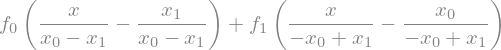

In [6]:
psi = lagpol_sym(1)
psi

In [7]:
f = abcpol(3)
f

Calculating the integrals:

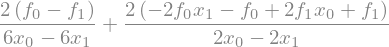

In [8]:
psi_ii = integrate(integrate(psi, (x, -1, xi)), (xi, -1, 1))
psi_ii

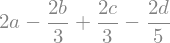

In [9]:
f_ii = integrate(integrate(f, (x, -1, xi)), (xi, -1, 1))
f_ii

We can substitute $f_0$ and $f_1$ by the values of $f(x_0)$ and $f(x_1)$ on the integrated expression of $\psi$:

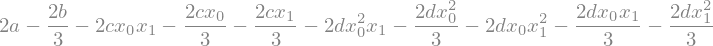

In [10]:
psi_ii = simplify(psi_ii.subs((
    [symbols('f_0'), f.subs(x, symbols('x_0'))],
    [symbols('f_1'), f.subs(x, symbols('x_1'))]
)))
psi_ii

By choosing the correct $x_i$, we are able to make both integrals have the same value for any value of $a, b, c$ and $d$.
In this case, the roots of the jacobi polynomial are:

In [11]:
roots_jacobi(2, 1, 0)[0]

array([-0.68989795,  0.28989795])

If we use them as the values of $x_i$:

In [12]:
psi_ii_num = simplify(psi_ii.subs((
    [symbols('x_0'), roots_jacobi(2, 1, 0)[0][0]],
    [symbols('x_1'), roots_jacobi(2, 1, 0)[0][1]]
)))
psi_ii_num

We can observe that we obtain the same value as the integral of $f(x)$, up to numerical accuracy:

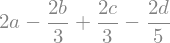

In [13]:
f_ii

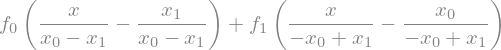

In [14]:
psi = lagpol_sym(1)
psi

In [15]:
simplify(psi.subs((
    [symbols('x_0'), 0],
    [symbols('x_1'), 1],
    [x, 2/5]
)))

### Higher Order

We can observe that we can approximate polynomials of degree 2n-1 exactly up to numerical accuracy

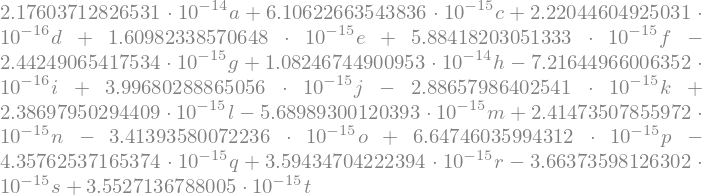

In [16]:
n = 10

f_new = abcpol(2*n-1)
psi_new = lagpol_abc(n)

f_new_ii = integrate(integrate(f_new, (x, -1, xi)), (xi, -1, 1))
psi_new_ii = integrate(integrate(psi_new, (x, -1, xi)), (xi, -1, 1))

f_new_ii-psi_new_ii

# An Hermite- Simpson Variation: HSJ

In [17]:
from sympy import jacobi_poly

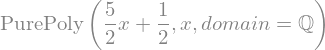

In [18]:
_j = jacobi_poly(1,2,1, polys=True)
_j

In [19]:
_j.real_roots()[0]

In [20]:
from sympy import Rational, factorial

In [21]:
h = symbols('h')

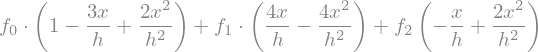

In [22]:
psi_qdd = lagpol_sym(2).subs([
    [symbols('x_0'), 0],
    [symbols('x_1'), h*Rational(1,2)],
    [symbols('x_2'), h]    
])
psi_qdd

In [23]:
q0, x0 = dynamicsymbols('q_0 x_0')
v0 = q0.diff()

qn, xn = dynamicsymbols('q_1 x_1')
vn = qn.diff()

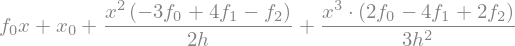

In [24]:
psi_x = integrate(psi_qdd, (x, 0, x))+x0
psi_x

In [25]:
psi_h2 = psi_x.subs(x, h*Rational(1,2))
f1 = solve(psi_h2, symbols('f_1'))[0]

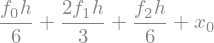

In [26]:
HS_x_n = simplify(psi_x.subs(x, h))
HS_x_n

In [27]:
#simplify(psi_x.subs(x, h).subs(symbols('f_1'), f1))

In [28]:
def taylor_q(n):
    q = dynamicsymbols("q_0")
    abc = [q,]
    for ii in range(n):
        abc.append(abc[-1].diff())
    sumat = 0
    for ii in range(n+1):
        sumat += abc[ii]*x**ii/factorial(ii)
    return sumat

def taylor_x(n):
    q = dynamicsymbols("x_0")
    abc = [q,]
    for ii in range(n):
        abc.append(abc[-1].diff())
    sumat = 0
    for ii in range(n+1):
        sumat += abc[ii]*x**ii/factorial(ii)
    return sumat

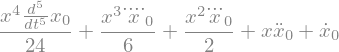

In [29]:
t5 = taylor_x(5)
t5_d = t5.diff(x)
t5_d

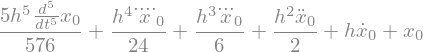

In [30]:
expr_hs = simplify(HS_x_n.subs([
    [symbols('f_0'), t5_d.subs(x, 0)],
    [symbols('f_1'), t5_d.subs(x, h*Rational(1,2))],
    [symbols('f_2'), t5_d.subs(x, h)],
]))
expr_hs

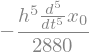

In [31]:
t5.subs(x, h)-expr_hs

### 2nd order HS

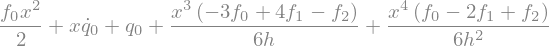

In [32]:
psi_q = integrate(integrate(psi_qdd, (x, 0, xi))+v0, (xi, 0, x))+q0
psi_q

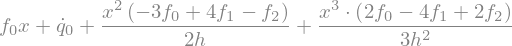

In [33]:
psi_v = integrate(psi_qdd, (x, 0, x))+v0
psi_v

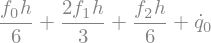

In [34]:
HS_v_n = simplify(psi_v.subs(x, h))
HS_v_n

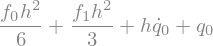

In [35]:
HS_q_n = simplify(psi_q.subs(x, h))
HS_q_n

In [36]:
coef_pol = coefpol(4)
coef_pol

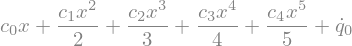

In [37]:
v_coef = integrate(coef_pol, (x, 0, x))+v0
v_coef

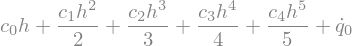

In [38]:
v_coef_n = v_coef.subs(x, h)
v_coef_n

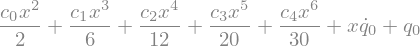

In [39]:
q_coef = integrate(integrate(coef_pol, (x, 0, xi))+v0, (xi, 0, x))+q0
q_coef

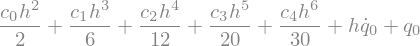

In [40]:
q_coef_n = q_coef.subs(x, h)
q_coef_n

In [41]:
coef_0 = coef_pol.subs(x, 0)
coef_c = coef_pol.subs(x, h*Rational(1,2))
coef_1 = coef_pol.subs(x, h)

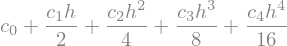

In [42]:
coef_c

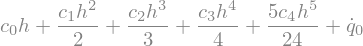

In [43]:
HS_v_n_coef = HS_v_n.subs([
    [symbols('f_0'), coef_0],
    [symbols('f_1'), coef_c],
    [symbols('f_2'), coef_1],
]).expand()

HS_v_n_coef

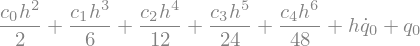

In [44]:
HS_q_n_coef = HS_q_n.subs([
    [symbols('f_0'), coef_0],
    [symbols('f_1'), coef_c],
    [symbols('f_2'), coef_1],
]).expand()

HS_q_n_coef

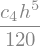

In [45]:
HS_v_err = HS_v_n_coef - v_coef_n
HS_v_err

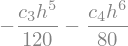

In [46]:
HS_q_err = HS_q_n_coef - q_coef_n
HS_q_err

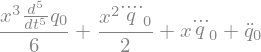

In [47]:
t5 = taylor_q(5)
t5_d = t5.diff(x)
t5_dd = t5_d.diff(x)
t5_dd

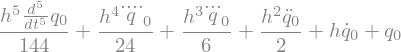

In [48]:
expr_hs_2 = simplify(HS_q_n.subs([
    [symbols('f_0'), t5_dd.subs(x, 0)],
    [symbols('f_1'), t5_dd.subs(x, h*Rational(1,2))],
    [symbols('f_2'), t5_dd.subs(x, h)],
]))
expr_hs_2

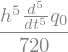

In [49]:
t5.subs(x, h)-expr_hs_2

### HS-J

In [50]:
hm = _j.real_roots()[0]
hm = h *(hm+1)/2
hm

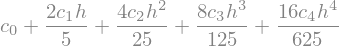

In [51]:
coef_cj = coef_pol.subs(x, hm)
coef_cj

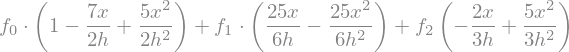

In [52]:
psi_qdd_j = lagpol_sym(2).subs([
    [symbols('x_0'), 0],
    [symbols('x_1'), hm],
    [symbols('x_2'), h]    
])
psi_qdd_j

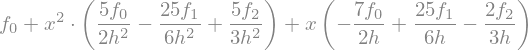

In [53]:
_a = psi_qdd_j.expand()
collect(_a, x)

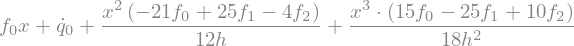

In [54]:
psi_v_j = integrate(psi_qdd_j, (x, 0, x))+v0
psi_v_j

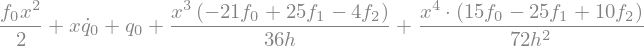

In [55]:
psi_q_j = integrate(integrate(psi_qdd_j, (x, 0, xi))+v0, (xi, 0, x))+q0
psi_q_j

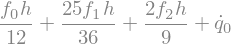

In [56]:
HSJ_v_n = simplify(psi_v_j.subs(x, h))
HSJ_v_n

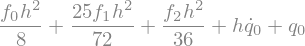

In [57]:
HSJ_q_n = simplify(psi_q_j.subs(x, h))
HSJ_q_n

In [58]:
vn

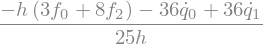

In [59]:
f1_hsj = simplify(solve(HSJ_v_n-vn, symbols('f_1'))[0])
f1_hsj

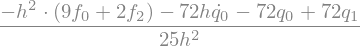

In [60]:
f1_hsj_q = simplify(solve(HSJ_q_n-qn, symbols('f_1'))[0])
f1_hsj_q

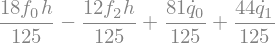

In [61]:
HSJ_v_c = simplify(psi_v_j.subs(x, 2*h/5))
HSJ_v_c = simplify(HSJ_v_c.subs(symbols('f_1'), f1_hsj))
HSJ_v_c

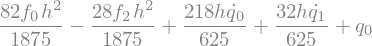

In [62]:
HSJ_q_c = simplify(psi_q_j.subs(x, 2*h/5))
HSJ_q_c = simplify(HSJ_q_c.subs(symbols('f_1'), f1_hsj))
HSJ_q_c

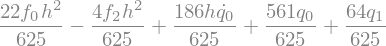

In [63]:
HSJ_q_c_q = simplify(psi_q_j.subs(x, 2*h/5))
HSJ_q_c_q = simplify(HSJ_q_c_q.subs(symbols('f_1'), f1_hsj_q))
HSJ_q_c_q

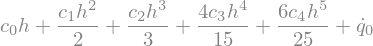

In [64]:
HSJ_v_n_coef = HSJ_v_n.subs([
    [symbols('f_0'), coef_0],
    [symbols('f_1'), coef_cj],
    [symbols('f_2'), coef_1],
]).expand()

HSJ_v_n_coef

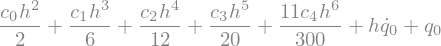

In [65]:
HSJ_q_n_coef = HSJ_q_n.subs([
    [symbols('f_0'), coef_0],
    [symbols('f_1'), coef_cj],
    [symbols('f_2'), coef_1],
]).expand()

HSJ_q_n_coef

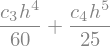

In [66]:
HSJ_v_err = HSJ_v_n_coef - v_coef_n
HSJ_v_err

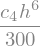

In [67]:
HSJ_q_err = HSJ_q_n_coef - q_coef_n
HSJ_q_err

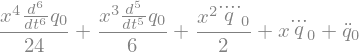

In [68]:
t6 = taylor_q(6)
t6_d = t6.diff(x)
t6_dd = t6_d.diff(x)
t6_dd

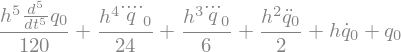

In [69]:
expr_hs_j = simplify(HSJ_q_n.subs([
    [symbols('f_0'), t5_dd.subs(x, 0)],
    [symbols('f_1'), t5_dd.subs(x, hm)],
    [symbols('f_2'), t5_dd.subs(x, h)],
]))
expr_hs_j

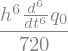

In [70]:
t6.subs(x, h)-expr_hs_j

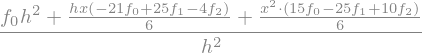

In [71]:
simplify(expand(psi_qdd_j, ))

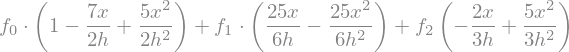

In [72]:
psi_qdd_j

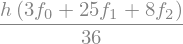

In [73]:
simplify(integrate(psi_qdd_j, (x, 0, h)))

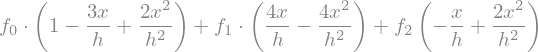

In [74]:
psi_qdd

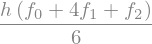

In [75]:
simplify(integrate(psi_qdd, (x, 0, h)))

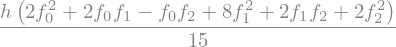

In [76]:
psi_sq = expand(psi_qdd**2)
exact_cost = simplify(integrate(psi_sq, (x, 0, h)))
exact_cost

### Expr nuevas

In [80]:
h_2 = h*Rational(1,2)
h_2

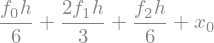

In [81]:
HS_x_n

In [82]:
f_x = abcpol(4)
f_x

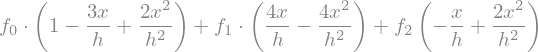

In [83]:
psi_qdd = lagpol_sym(2).subs([
    [symbols('x_0'), 0],
    [symbols('x_1'), h_2],
    [symbols('x_2'), h]    
])
psi_qdd

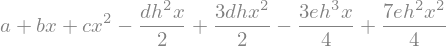

In [84]:
simplify(psi_qdd.subs([
    [symbols('f_0'), f_x.subs(x, 0)],
    [symbols('f_1'), f_x.subs(x, h_2)],
    [symbols('f_2'), f_x.subs(x, h)],
]))

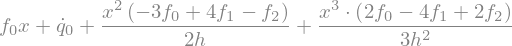

In [85]:
psi_v = integrate(psi_qdd, (x, 0, x))+v0
psi_v

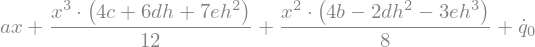

In [86]:
psi_v_hs = simplify(psi_v.subs([
    [symbols('f_0'), f_x.subs(x, 0)],
    [symbols('f_1'), f_x.subs(x, h_2)],
    [symbols('f_2'), f_x.subs(x, h)],
]))
psi_v_hs

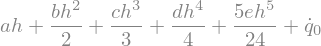

In [87]:
psi_v_hs_h = simplify(psi_v_hs.subs(x,h))
psi_v_hs_h

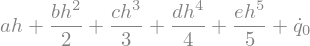

In [88]:
v_real = integrate(f_x, (x, 0, x))+v0
v_real_h = v_real.subs(x, h)
v_real_h

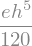

In [89]:
err_HS1_v = psi_v_hs_h-v_real_h
err_HS1_v

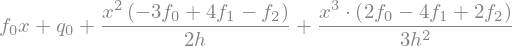

In [90]:
psi_q = integrate(psi_qdd, (x, 0, x))+q0
psi_q

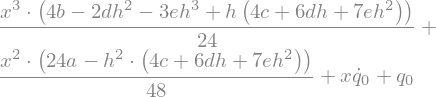

In [91]:
psi_q_hs = simplify(psi_q.subs([
    [symbols('f_0'), psi_v_hs.subs(x, 0)],
    [symbols('f_1'), psi_v_hs.subs(x, h_2)],
    [symbols('f_2'), psi_v_hs.subs(x, h)],
]))
psi_q_hs

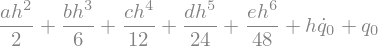

In [92]:
q_hs_h = simplify(psi_q_hs.subs(x,h))
q_hs_h

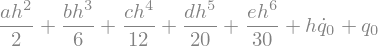

In [93]:
q_real = integrate(integrate(f_x, (x, 0, xi))+v0, (xi, 0, x))+q0
q_real_h = q_real.subs(x, h)
q_real_h

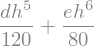

In [94]:
err_HS1_q = q_real_h- q_hs_h
err_HS1_q

### HS2

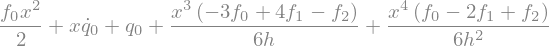

In [95]:
psi_q_2 = integrate(integrate(psi_qdd, (x, 0, xi))+v0, (xi, 0, x))+q0
psi_q_2

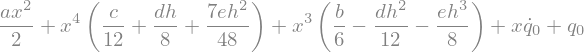

In [96]:
psi_q_hs2 = simplify(psi_q_2.subs([
    [symbols('f_0'), f_x.subs(x, 0)],
    [symbols('f_1'), f_x.subs(x, h_2)],
    [symbols('f_2'), f_x.subs(x, h)],
]))
psi_q_hs2

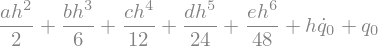

In [97]:
q_hs2_h = simplify(psi_q_hs2.subs(x,h))
q_hs2_h

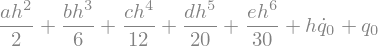

In [98]:
q_real_h

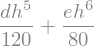

In [99]:
err_HS2_q = q_real_h- q_hs2_h
err_HS2_q

#### GJ

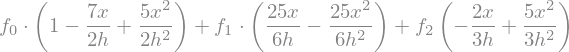

In [100]:
psi_qdd_j

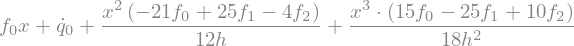

In [101]:
psi_qd_j = integrate(psi_qdd_j, (x, 0, x))+v0
psi_qd_j

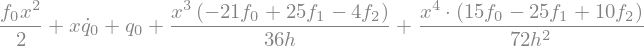

In [102]:
psi_q_j

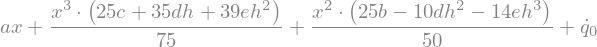

In [103]:
psi_v_hsj = simplify(psi_qd_j.subs([
    [symbols('f_0'), f_x.subs(x, 0)],
    [symbols('f_1'), f_x.subs(x, hm)],
    [symbols('f_2'), f_x.subs(x, h)],
]))
psi_v_hsj

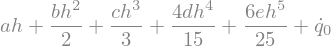

In [104]:
psi_v_hsj_h = simplify(psi_v_hsj.subs(x,h))
psi_v_hsj_h

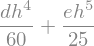

In [105]:
err_HSJ_v = psi_v_hsj_h-v_real_h
err_HSJ_v

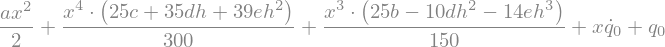

In [106]:
psi_q_hsj = simplify(psi_q_j.subs([
    [symbols('f_0'), f_x.subs(x, 0)],
    [symbols('f_1'), f_x.subs(x, hm)],
    [symbols('f_2'), f_x.subs(x, h)],
]))
psi_q_hsj

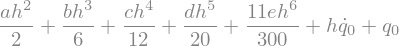

In [107]:
q_hsj_h = simplify(psi_q_hsj.subs(x,h))
q_hsj_h

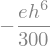

In [108]:
err_HSJ_q = q_real_h- q_hsj_h
err_HSJ_q

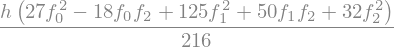

In [109]:
psi_sq_j = expand(psi_qdd_j**2)
exact_cost_hsj = simplify(integrate(psi_sq_j, (x, 0, h)))
exact_cost_hsj

In [110]:
np_printer(exact_cost_hsj)

'(1/216)*h*(27*f_0**2 - 18*f_0*f_2 + 125*f_1**2 + 50*f_1*f_2 + 32*f_2**2)'

In [111]:
np_printer(exact_cost)

'(1/15)*h*(2*f_0**2 + 2*f_0*f_1 - f_0*f_2 + 8*f_1**2 + 2*f_1*f_2 + 2*f_2**2)'

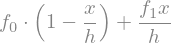

In [112]:
psi_qdd_tz = lagpol_sym(1).subs([
    [symbols('x_0'), 0],
    [symbols('x_1'), h]    
])
psi_qdd_tz

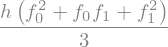

In [113]:
psi_sq_tz = expand(psi_qdd_tz**2)
exact_cost_tz = simplify(integrate(psi_sq_tz, (x, 0, h)))
exact_cost_tz

In [114]:
np_printer(exact_cost_tz)

'(1/3)*h*(f_0**2 + f_0*f_1 + f_1**2)'

In [115]:
vc = symbols('\dot{q}_c')
v0, vc, vn

In [116]:
f0, fc, fn = symbols('f_0 f_c f_1')
f0, fc, fn

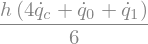

In [117]:
_aa = h/6*(v0+4*vc+vn)
_aa

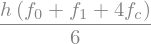

In [118]:
expl_vn = h/6*(f0+4*fc+fn)
expl_vn

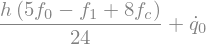

In [119]:
expl_vc = v0 + h/24*(5*f0+8*fc-fn)
expl_vc

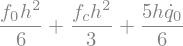

In [120]:
_bb = _aa.subs([
    [vn, expl_vn],
    [vc, expl_vc],
])
_bb.expand()

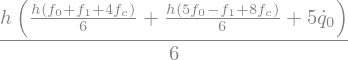

In [121]:
_bb

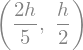

In [122]:
hm, h_2

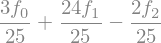

In [123]:
psi_qdd.subs(x, hm)

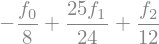

In [124]:
psi_qdd_j.subs(x, h_2)